# Prediction the Sale Price of Bulldozers Using Machine Learning


### 1. Problem Definition

The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

Fast Iron is creating a "blue book for bull dozers," for customers to value what their heavy equipment fleet is worth at auction.

This competition was launched under the Kaggle Startup Program

### 2. Data

The data for this competition is split into three parts:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
The key fields are in train.csv are:

SalesID: the uniue identifier of the sale
MachineID: the unique identifier of a machine.  A machine can be sold multiple times
saleprice: what the machine sold for at auction (only provided in train.csv)
saledate: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.
The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

### 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

6. Features


In [1]:
## import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [3]:
# Import Training & Validation Sets:
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

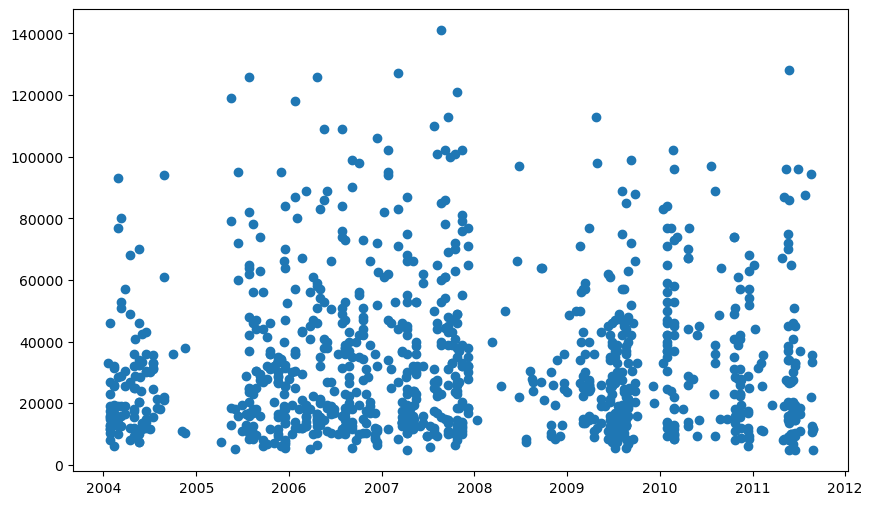

In [5]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [6]:
# Sorting original dataframe by saledate:
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [7]:
#Copying Original Dataframe for further manipulation
df_temp = df.copy()

In [8]:
# Add datetime parameters for saledate column
df_temp['saleyear'] = df_temp['saledate'].dt.year
df_temp['salemonth'] = df_temp['saledate'].dt.month
df_temp['saleday'] = df_temp['saledate'].dt.day
df_temp['saledayofweek'] = df_temp['saledate'].dt.dayofweek
df_temp['saledayofyear'] = df_temp['saledate'].dt.dayofyear
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [9]:
df_temp.drop('saledate', axis=1, inplace=True)

In [10]:
df_temp[:100].T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,205782,115957,168619,28820,113547,113454,62665,78445,233279,28223
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,1647218,1453139,1595295,1259842,1449754,1449641,1328950,1371695,1729063,1257862
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,12500.0,37000.0,16000.0,9000.0,11000.0,11750.0,19000.0,28000.0,48000.0,25000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1540235,1456099,1291243,1226323,1486544,492948,1444418,1444477,1059447,1363747
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,8443,3854,8298,6788,3356,3356,4089,1571,9113,6589
datasource,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,18.0,18.0,99.0,99.0,99.0,99.0,4.0,4.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1979,1978,1977,1978,1967,1966,1983,1982,1984,1983
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B,D6C,IT12,544,D5HII,12F,...,40,966C,750,580,12F,12F,D3B,D5BLGP,WA300,1450


In [11]:
# Converting String Dtypes into Pandas categories
for labels, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[labels] = content.astype('category').cat.as_ordered()

# Fill Missing Data

In [19]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #df_temp[label+'was_missing'] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [25]:
# Filling Categorical Missing Values

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #df_temp[label+'was_missing'] = pd.isnull(content)
            df_temp[label] = pd.Categorical(content).codes +1

In [26]:
pd.Categorical(df_temp['fiBaseModel']).codes + 1

array([1744,  559,  713, ...,  203,   19,  307], dtype=int16)

In [32]:
df_temp.fiModelDesc = pd.Categorical(df_temp.fiModelDesc).codes
df_temp.fiBaseModel = pd.Categorical(df_temp.fiBaseModel).codes
df_temp.fiProductClassDesc = pd.Categorical(df_temp.fiProductClassDesc).codes
df_temp.state = pd.Categorical(df_temp.state).codes
df_temp.ProductGroup = pd.Categorical(df_temp.ProductGroup).codes
df_temp.ProductGroupDesc = pd.Categorical(df_temp.ProductGroupDesc).codes


In [38]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4592,...,1,8,6,0,0,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1819,...,0,0,0,4,2,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2347,...,1,8,6,0,0,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1818,...,0,0,0,4,2,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2118,...,1,6,5,0,0,1989,1,31,1,31


# Modeling

In [36]:
# Initial Fitting
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42)
X = df_temp.drop('SalePrice', axis=1)
y = df_temp['SalePrice']

model.fit(X, y)
model.score(X, y)


CPU times: user 10min 4s, sys: 6.32 s, total: 10min 10s
Wall time: 1min 58s


0.9875605620349615

In [53]:
# Train x Test Splitting
df_train = df_temp[df_temp.saleyear!= 2012]
df_val = df_temp[df_temp.saleyear == 2012]

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_val, y_val = df_val.drop('SalePrice', axis=1), df_val['SalePrice']


# RMSLE Evaluation

In [66]:
# Compute RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import r2_score

#RMSLE == np.sqrt(mean_squared_log_error(y_test, predictions ))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"MAE": mean_absolute_error(y_train, train_preds), 
              "Validation MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
              "Validation RMSLE": np.sqrt(mean_squared_log_error(y_val, val_preds)),
              "Training R2": r2_score(y_train, train_preds),
              "Validation R2": r2_score(y_val, val_preds)}
    return scores 
        
    

## Testing on a subset

In [68]:
model = RandomForestRegressor(n_jobs = -1, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [69]:
show_scores(model)

{'MAE': 1577.284350439389,
 'Validation MAE': 6123.042204268557,
 'Training RMSLE': 0.08423102061167131,
 'Validation RMSLE': 0.25529081626494365,
 'Training R2': 0.9875169449218242,
 'Validation R2': 0.8725564168794766}

In [83]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10), 
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': ([0.5, 1.0, 'sqrt', 'log2']),
            'max_samples': [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state=42), 
                              param_distributions = rf_grid, 
                              n_iter = 100, 
                              cv=5, 
                              verbose=True)
rs_model.fit(X_train, y_train)




Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [84]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': None}

In [85]:
show_scores(rs_model)

{'MAE': 5888.572450632459,
 'Validation MAE': 7400.014746401194,
 'Training RMSLE': 0.26870929785293546,
 'Validation RMSLE': 0.3004174431800535,
 'Training R2': 0.8434518893716911,
 'Validation R2': 0.8190544639260419}

In [87]:
tuned_model = RandomForestRegressor(n_estimators=40, min_samples_split=18, min_samples_leaf=1, max_features=1.0, max_depth=None)
tuned_model.fit(X_train, y_train)
show_scores(tuned_model)

{'MAE': 3092.7257421883955,
 'Validation MAE': 6111.732601326733,
 'Training RMSLE': 0.1506148033425604,
 'Validation RMSLE': 0.2525834780765703,
 'Training R2': 0.9544922473420261,
 'Validation R2': 0.8725958769472635}

In [146]:
df_test = pd.read_csv('bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates=["saledate"])

In [147]:
df_test.saledate.dtypes

dtype('<M8[ns]')

In [148]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [149]:
# Preprocessing Test Data
#test_preds = tuned_model.predict(df_test)

In [150]:
df_test['saleyear'] = df_test['saledate'].dt.year
df_test['salemonth'] = df_test['saledate'].dt.month
df_test['saleday'] = df_test['saledate'].dt.day
df_test['saledayofweek'] = df_test['saledate'].dt.dayofweek
df_test['saledayofyear'] = df_test['saledate'].dt.dayofyear

df_test.drop('saledate', axis=1, inplace=True)



for labels, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[labels] = content.astype('category').cat.as_ordered()

for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #df_temp[label+'was_missing'] = pd.isnull(content)
            df_test[label] = content.fillna(content.median())
            
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #df_temp[label+'was_missing'] = pd.isnull(content)
            df_test[label] = pd.Categorical(content).codes +1


In [152]:
df_test.fiModelDesc = pd.Categorical(df_test.fiModelDesc).codes
df_test.fiBaseModel = pd.Categorical(df_test.fiBaseModel).codes
df_test.fiProductClassDesc = pd.Categorical(df_test.fiProductClassDesc).codes
df_test.state = pd.Categorical(df_test.state).codes
df_test.ProductGroup = pd.Categorical(df_test.ProductGroup).codes
df_test.ProductGroupDesc = pd.Categorical(df_test.ProductGroupDesc).codes

In [153]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
0,1227829,1006309,3168,121,3,1999,3688.0,2,498,179,...,0,0,0,0,0,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,1,830,291,...,0,0,0,3,2,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,3,1176,403,...,0,0,0,0,0,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,1,286,112,...,0,0,0,0,0,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,2,565,195,...,1,4,5,0,0,2012,5,10,3,131


In [158]:
test_preds = tuned_model.predict(df_test)
test_preds

array([21610.03813374, 17984.55953918, 47228.99542638, ...,
       11498.7526483 , 18055.29055433, 30497.95652272])

In [159]:
# Formatting into competition format:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,21610.038134
1,1227844,17984.559539
2,1227847,47228.995426
3,1227848,85147.712692
4,1227863,63405.856233
...,...,...
12452,6643171,54338.876681
12453,6643173,10820.710579
12454,6643184,11498.752648
12455,6643186,18055.290554


# Feature Importance

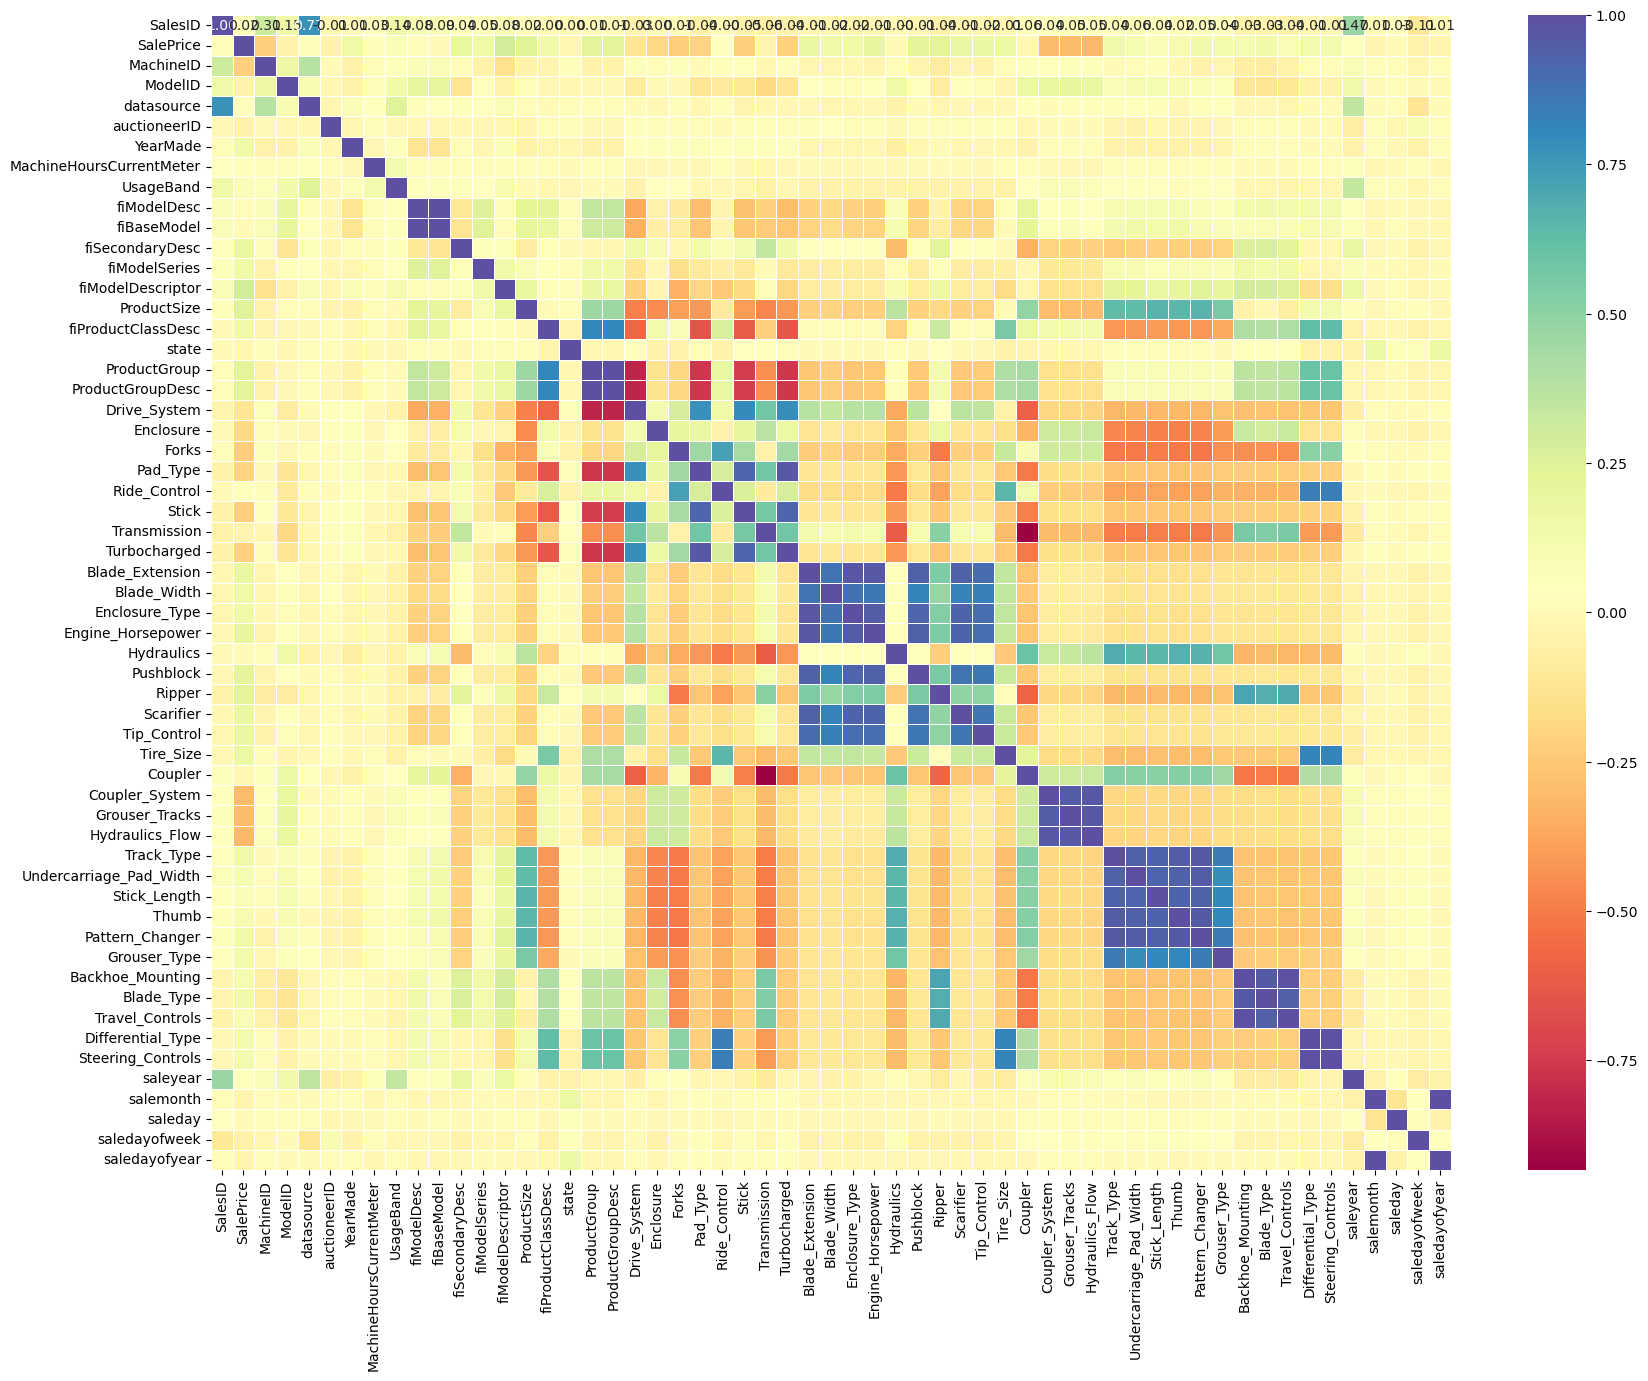

In [162]:
corr_matrix = df_temp.corr()
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "Spectral")

In [163]:
tuned_model.feature_importances_

array([4.64113886e-02, 1.13860075e-02, 3.21574369e-02, 1.88934090e-04,
       2.82762214e-03, 2.73592658e-01, 2.28868899e-03, 7.84457073e-04,
       1.98165369e-02, 8.01380828e-02, 5.47461770e-02, 4.69945980e-03,
       4.02442496e-03, 2.41441664e-01, 3.98267897e-02, 5.46485312e-03,
       2.30127066e-04, 1.60785990e-04, 1.75719954e-03, 8.35257545e-03,
       3.23887739e-04, 2.64960816e-05, 4.72546930e-04, 1.62677278e-04,
       1.70810374e-03, 2.00057780e-05, 1.65420415e-03, 8.44802697e-03,
       5.20122414e-04, 3.85444742e-05, 6.31976590e-03, 2.26605841e-03,
       2.19553361e-03, 5.31773081e-03, 2.52780958e-03, 1.74341532e-03,
       8.07400248e-04, 3.14427313e-02, 5.61209972e-06, 4.28737728e-06,
       1.71737465e-04, 8.25473485e-04, 9.15552162e-04, 5.00417372e-04,
       1.78021171e-04, 2.90482732e-04, 3.39862071e-04, 1.30418142e-03,
       9.88348853e-04, 1.38064005e-04, 2.33885347e-04, 7.75310556e-02,
       1.47414846e-03, 5.06086744e-03, 2.50116718e-03, 1.12459048e-02])

In [178]:
def plot_features(columns, importances, n=20):
    df = pd.DataFrame({'features': columns, 
                        'feature_importances': importances}).sort_values('feature_importances', ascending=False).reset_index(drop=True)
    #plot dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Importance')
    ax.invert_yaxis()
    

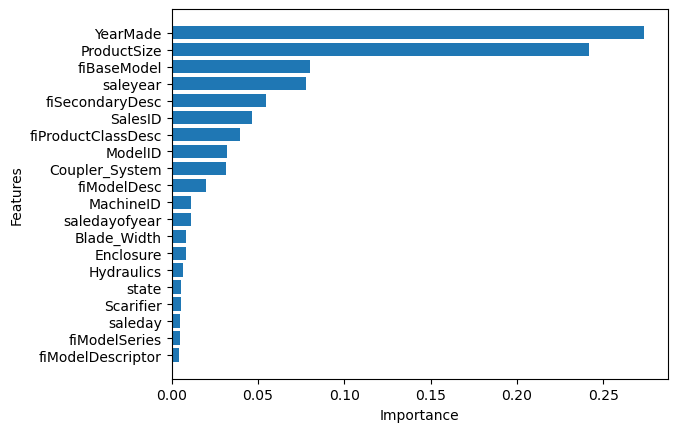

In [179]:
plot_features(X_train.columns, tuned_model.feature_importances_)